In [2]:
import numpy as np
from scipy.special import roots_legendre,roots_laguerre
from scipy.stats import norm
import matplotlib.pyplot as plt

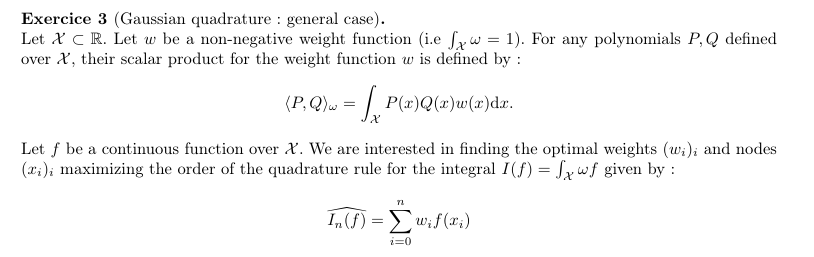

In [3]:
from IPython import display
display.Image('theory.png')

# Implementation of exercice 3 TD 4

8. . For $\chi$ = [a, b], what change of variable should be applied to the nodes $x_i$ ?

It depends on which methods we want to implement. We need to adjust the $x_i$ in order to fit in the given interval.

For example if we pick legendre method $\chi _{legendre}$ = [-1, 1] so we need to make the change of variable $y_i = \frac {a+b} 2 + \frac {b-a} 2 x_i $ where $x_i$ are Legendre nodes

Then $$\int_{a}^{b} f(x) \, \mathrm{d}x =  \frac {b-a} 2 \int_{-1}^{1} f(\frac {a+b} 2 + \frac {b-a} 2 x) \, \mathrm{d}x =  \frac {b-a} 2 \sum_{i=0}^{n} w_i f(y_i)$$

For example if we pick laguerre method $\chi _{legendre}$ = [0, $+\infty$[ so we need to make the change of variable $y_i = x_i + a $

In [4]:
#9 
def gauss_legendre_simple(f, a, b, nodes, weights):
    ''' Return an integral approximation of f on [a,b] based on MQS gauss-legendre polynomials roots'''
    return (b-a)/2*np.sum([weights[i]*f((a+b)/2+(b-a)*nodes[i]/2) for i in range(len(weights))])


#Test 
x,w= roots_legendre(5)         #Order of the method
I_approx=gauss_legendre_simple(lambda x: 1/x, 2,5,x,w)
I_th= np.log(5/2)
print('Approximated value : ',I_approx)
print('Theoritical value',I_th)
print('Relative Error : ' ,np.abs(I_approx-I_th)/I_th )


Approximated value :  0.9162902816544025
Theoritical value 0.9162907318741551
Relative Error :  4.913503290263774e-07


In [5]:
#10
def gauss_legendre(f, n, M, a, b):
    ''' Return an integral approximation of f on [a,b] based on MQC gauss-legendre polynomials roots'''
    x,w= roots_legendre(n)
    step=(b-a)/M
    return np.sum([gauss_legendre_simple(f, a+i*step,a+(i+1)*step,x,w) for i in range(M)])

#Test 
n=5
M=5
I_approx=gauss_legendre(lambda x: 1/x, n,M,2,5)
I_th=np.log(5/2)
print('Approximated value : ',I_approx)
print('Theoritical value',I_th)
print('Relative Error : ' ,np.abs(I_approx-I_th)/I_th )

Approximated value :  0.9162907318735335
Theoritical value 0.9162907318741551
Relative Error :  6.784024435303343e-13


In [6]:
#11
def gauss_legendre_vectorized(f,n, M, a, b):
    ''' Return an integral approximation of vector function f on [a,b] based on MQC gauss-legendre polynomials roots'''
    return np.array([gauss_legendre(lambda x : f(x)[i],n,M,a,b) for i in range(len(f(a)))])

#Test 
n=5
M=5
I_approx=gauss_legendre_vectorized(lambda x : (x**2,1/x),n,M,2,5)
I_th= [(5**3-2**3)/3,np.log(5/2)]
print('Approximated value : ',I_approx)
print('Theoritical value',I_th)
print('Relative Error : ' ,np.abs(I_approx-I_th)/I_th )


Approximated value :  [39.          0.91629073]
Theoritical value [39.0, np.float64(0.9162907318741551)]
Relative Error :  [0.00000000e+00 6.78402444e-13]


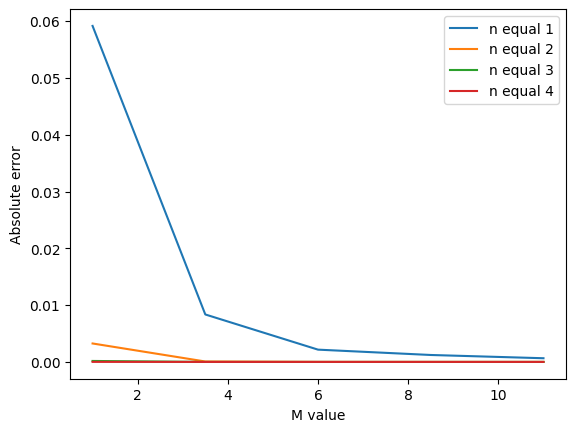

In [7]:
#You can change n starting and ending values.
for n in range(1,5,1):
    plt.plot(np.linspace(1,11,5),[np.abs(gauss_legendre(lambda x: 1/x, n,int(M),2,5)-np.log(5/2)) for M in np.linspace(1,11,5)],label='n equal '+str(n))
plt.xlabel('M value')
plt.ylabel('Absolute error')
plt.legend()

plt.show()

In [8]:
#13

M=10
def trapezoidal(f,M,a,b):
    h=(b-a)/M
    return ((f(a)+f(b))/2+np.sum(np.array([f(a+i*h) for i in range(1,M)])))*h

print(' Gauss-legendre error : ',np.abs(gauss_legendre(lambda x: 1/x, M,M,2,5)-np.log(5/2)),'\n','Trapezoidal error : ',np.abs(trapezoidal(lambda x: 1/x,M,2,5)-np.log(5/2)))

#Clearly Gauss-Legendre is much more efficient. The fact that Trapezoidal is only of order 1 and Gauss-Legendre of order (2M+1) is well illustrated in 
#this case

 Gauss-legendre error :  1.1102230246251565e-16 
 Trapezoidal error :  0.0015709332397410014


In [9]:
#14 For this question we will use Laguerre polynomials and the fact that P(X<=a) is the same as 1-P(X>a)
n=5
def normal_cdf_laguerre(a,n):
    f=lambda x : np.exp(-x**2/2)/np.sqrt(2*np.pi)
    x,w=roots_laguerre(n)
    return 1-np.sum(np.array([w[i]*f(x[i]+a) for i in range(n)]))

def normal_cdf_legendre(a,n,eps):                    #eps is an error bound using concentration inequality helping finding b such that P(X>=b)<eps.
    b=np.sqrt(-2*np.log(np.sqrt(2*np.pi)*eps))
    return 1-gauss_legendre(lambda x : np.exp(-x**2/2)/np.sqrt(2*np.pi),n,n//3,a,max(a+1,b))

eps=10**-10
a=3
n=15
Laguerre_cdf=normal_cdf_laguerre(a,n)
Legendre_cdf=normal_cdf_legendre(a,n,eps)
cdf_numpy=norm.cdf(a)
print('Laguerre Approximation : ',Laguerre_cdf)
print('Legendre Approximation : ',Legendre_cdf)
print('Theoritical value',cdf_numpy)
print('Laguerre Relative Error : ' ,np.abs(Laguerre_cdf-cdf_numpy)/cdf_numpy )
print('Legendre Relative Error : ' ,np.abs(Legendre_cdf-cdf_numpy)/cdf_numpy )

#Legendre approximation seems really good. We can even ask ourselves if numpy cdf approximation is not based on this method since we get 
#an error lower than our epsilon of precision

Laguerre Approximation :  0.9989512014669334
Legendre Approximation :  0.9986501019830897
Theoritical value 0.9986501019683699
Laguerre Relative Error :  0.00030150650159652397
Legendre Relative Error :  1.473967801202547e-11
